In [7]:
def get_obj_values(run_gen_text_content: str):
    output_list = []
    for solution_text in run_gen_text_content.split("--------------")[:-1]:
        run_gen_solution_text_content = solution_text
        output_list.append([float(item[item.find(': ')+2:]) for item in run_gen_solution_text_content[run_gen_solution_text_content.find(']')+1:].split('\n')[1:-1]])
    return output_list

In [8]:
import os

def load_runs_and_gens_as_dict(directory="."):
    data = {}
    run_index = 0

    while True:
        run_key = f"run_{run_index}"
        gen_index = 0
        run_data = []

        while True:
            filename = f"{run_key}_gen_{gen_index}.txt"
            filepath = os.path.join(directory, filename)

            if os.path.isfile(filepath):
                with open(filepath, 'r', encoding='utf-8') as f:
                    run_data.append(get_obj_values(f.read()))
                gen_index += 1
            else:
                break  # No more gens for this run

        if run_data:
            data[run_key] = run_data
            run_index += 1
        else:
            break  # No more runs

    return data


In [9]:
run_gen_dict = load_runs_and_gens_as_dict()
run_gen_dict

{'run_0': [[[0.48, 0.65, 0.44],
   [0.52, 0.63, 0.49],
   [0.62, 0.64, 0.39],
   [0.59, 0.64, 0.4],
   [0.65, 0.63, 0.46]],
  [[0.48, 0.65, 0.44],
   [0.52, 0.63, 0.49],
   [0.62, 0.64, 0.39],
   [0.59, 0.64, 0.4],
   [0.51, 0.65, 0.43],
   [0.55, 0.65, 0.38],
   [0.54, 0.63, 0.46],
   [0.64, 0.63, 0.41],
   [0.53, 0.66, 0.42],
   [0.65, 0.62, 0.42],
   [0.53, 0.64, 0.45],
   [0.53, 0.62, 0.49]],
  [[0.52, 0.63, 0.49],
   [0.44, 0.64, 0.43],
   [0.54, 0.62, 0.36],
   [0.45, 0.66, 0.42],
   [0.53, 0.62, 0.46]],
  [[0.52, 0.63, 0.49],
   [0.44, 0.64, 0.43],
   [0.54, 0.62, 0.36],
   [0.54, 0.61, 0.51],
   [0.53, 0.62, 0.37],
   [0.59, 0.61, 0.38],
   [0.4, 0.65, 0.39],
   [0.51, 0.66, 0.35]]],
 'run_1': [[[0.53, 0.78, 0.21],
   [0.63, 0.79, 0.18],
   [0.59, 0.77, 0.26],
   [0.58, 0.76, 0.36]],
  [[0.53, 0.78, 0.21],
   [0.63, 0.79, 0.18],
   [0.59, 0.77, 0.26],
   [0.58, 0.76, 0.36],
   [0.5, 0.8, 0.24],
   [0.63, 0.77, 0.25],
   [0.56, 0.77, 0.35],
   [0.65, 0.79, 0.17],
   [0.5, 0.77, 

In [10]:
def dict_to_data_for_visualization(run_gen_values_dict: dict):
    all = {}
    for key,run in run_gen_values_dict.items():
        all[key] = {}
        for generation in run:
            all[key][run.index(generation)] = {}
            min_obj1 = min([solution[0] for solution in generation])
            min_obj2 = min([solution[1] for solution in generation])
            min_obj3 = min([solution[2] for solution in generation])
            avg_obj1 = sum([solution[0] for solution in generation]) / len(generation)
            avg_obj2 = sum([solution[1] for solution in generation]) / len(generation)
            avg_obj3 = sum([solution[2] for solution in generation]) / len(generation)

            all[key][run.index(generation)]["min_obj1"] = min_obj1
            all[key][run.index(generation)]["min_obj2"] = min_obj2
            all[key][run.index(generation)]["min_obj3"] = min_obj3

            all[key][run.index(generation)]["avg_obj1"] = avg_obj1
            all[key][run.index(generation)]["avg_obj2"] = avg_obj2
            all[key][run.index(generation)]["avg_obj3"] = avg_obj3

            print(f"For the run index {key} and generation index {run.index(generation)}:")
            print(f"MIN of objective index 0: {min_obj1}")
            print(f"MIN of objective index 1: {min_obj2}")
            print(f"MIN of objective index 2: {min_obj3}")
            print(f"AVG of objective index 0: {avg_obj1}")
            print(f"AVG of objective index 1: {avg_obj2}")
            print(f"AVG of objective index 2: {avg_obj3}")
            print("--------------")
    return all


visualization_data = dict_to_data_for_visualization(run_gen_dict)
visualization_data

For the run index run_0 and generation index 0:
MIN of objective index 0: 0.48
MIN of objective index 1: 0.63
MIN of objective index 2: 0.39
AVG of objective index 0: 0.572
AVG of objective index 1: 0.638
AVG of objective index 2: 0.43600000000000005
--------------
For the run index run_0 and generation index 1:
MIN of objective index 0: 0.48
MIN of objective index 1: 0.62
MIN of objective index 2: 0.38
AVG of objective index 0: 0.5575
AVG of objective index 1: 0.6383333333333333
AVG of objective index 2: 0.43166666666666664
--------------
For the run index run_0 and generation index 2:
MIN of objective index 0: 0.44
MIN of objective index 1: 0.62
MIN of objective index 2: 0.36
AVG of objective index 0: 0.496
AVG of objective index 1: 0.634
AVG of objective index 2: 0.43200000000000005
--------------
For the run index run_0 and generation index 3:
MIN of objective index 0: 0.4
MIN of objective index 1: 0.61
MIN of objective index 2: 0.35
AVG of objective index 0: 0.50875
AVG of objecti

{'run_0': {0: {'min_obj1': 0.48,
   'min_obj2': 0.63,
   'min_obj3': 0.39,
   'avg_obj1': 0.572,
   'avg_obj2': 0.638,
   'avg_obj3': 0.43600000000000005},
  1: {'min_obj1': 0.48,
   'min_obj2': 0.62,
   'min_obj3': 0.38,
   'avg_obj1': 0.5575,
   'avg_obj2': 0.6383333333333333,
   'avg_obj3': 0.43166666666666664},
  2: {'min_obj1': 0.44,
   'min_obj2': 0.62,
   'min_obj3': 0.36,
   'avg_obj1': 0.496,
   'avg_obj2': 0.634,
   'avg_obj3': 0.43200000000000005},
  3: {'min_obj1': 0.4,
   'min_obj2': 0.61,
   'min_obj3': 0.35,
   'avg_obj1': 0.50875,
   'avg_obj2': 0.63,
   'avg_obj3': 0.41}},
 'run_1': {0: {'min_obj1': 0.53,
   'min_obj2': 0.76,
   'min_obj3': 0.18,
   'avg_obj1': 0.5825,
   'avg_obj2': 0.775,
   'avg_obj3': 0.2525},
  1: {'min_obj1': 0.5,
   'min_obj2': 0.76,
   'min_obj3': 0.17,
   'avg_obj1': 0.5772727272727273,
   'avg_obj2': 0.7827272727272727,
   'avg_obj3': 0.25},
  2: {'min_obj1': 0.49,
   'min_obj2': 0.76,
   'min_obj3': 0.17,
   'avg_obj1': 0.5758333333333333,
 

{0: {'min_obj1': 0.48, 'min_obj2': 0.63, 'min_obj3': 0.39, 'avg_obj1': 0.572, 'avg_obj2': 0.638, 'avg_obj3': 0.43600000000000005}, 1: {'min_obj1': 0.48, 'min_obj2': 0.62, 'min_obj3': 0.38, 'avg_obj1': 0.5575, 'avg_obj2': 0.6383333333333333, 'avg_obj3': 0.43166666666666664}, 2: {'min_obj1': 0.44, 'min_obj2': 0.62, 'min_obj3': 0.36, 'avg_obj1': 0.496, 'avg_obj2': 0.634, 'avg_obj3': 0.43200000000000005}, 3: {'min_obj1': 0.4, 'min_obj2': 0.61, 'min_obj3': 0.35, 'avg_obj1': 0.50875, 'avg_obj2': 0.63, 'avg_obj3': 0.41}}


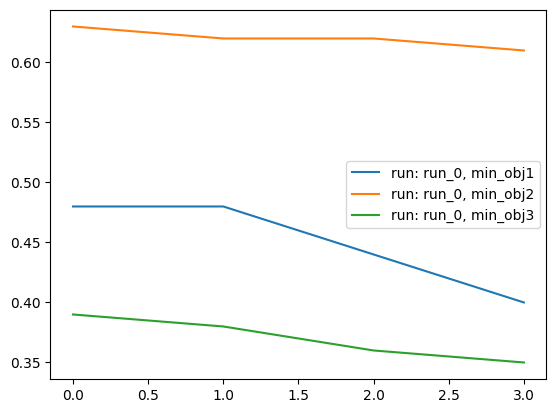

{0: {'min_obj1': 0.53, 'min_obj2': 0.76, 'min_obj3': 0.18, 'avg_obj1': 0.5825, 'avg_obj2': 0.775, 'avg_obj3': 0.2525}, 1: {'min_obj1': 0.5, 'min_obj2': 0.76, 'min_obj3': 0.17, 'avg_obj1': 0.5772727272727273, 'avg_obj2': 0.7827272727272727, 'avg_obj3': 0.25}, 2: {'min_obj1': 0.49, 'min_obj2': 0.76, 'min_obj3': 0.17, 'avg_obj1': 0.5758333333333333, 'avg_obj2': 0.7808333333333334, 'avg_obj3': 0.25}, 3: {'min_obj1': 0.49, 'min_obj2': 0.76, 'min_obj3': 0.15, 'avg_obj1': 0.545, 'avg_obj2': 0.77625, 'avg_obj3': 0.25125}}


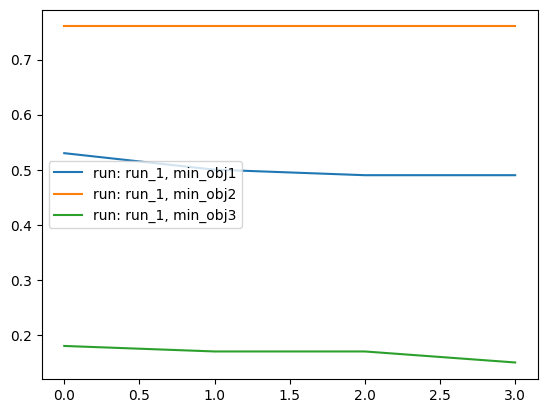

{0: {'min_obj1': 0.53, 'min_obj2': 0.8, 'min_obj3': 0.14, 'avg_obj1': 0.58, 'avg_obj2': 0.8160000000000001, 'avg_obj3': 0.19}, 1: {'min_obj1': 0.52, 'min_obj2': 0.8, 'min_obj3': 0.12, 'avg_obj1': 0.57, 'avg_obj2': 0.8099999999999999, 'avg_obj3': 0.162}, 2: {'min_obj1': 0.51, 'min_obj2': 0.8, 'min_obj3': 0.12, 'avg_obj1': 0.5542857142857143, 'avg_obj2': 0.812857142857143, 'avg_obj3': 0.16142857142857142}, 3: {'min_obj1': 0.47, 'min_obj2': 0.8, 'min_obj3': 0.12, 'avg_obj1': 0.5433333333333333, 'avg_obj2': 0.8122222222222223, 'avg_obj3': 0.17}}


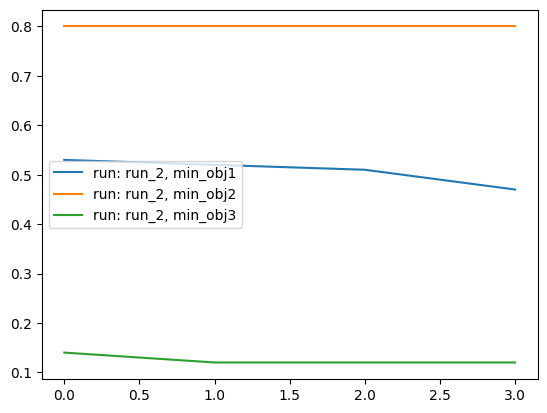

In [11]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        min_obj1_values = []
        min_obj2_values = []
        min_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            min_obj1 = gen_values["min_obj1"]
            min_obj2 = gen_values["min_obj2"]
            min_obj3 = gen_values["min_obj3"]

            min_obj1_values.append(min_obj1)
            min_obj2_values.append(min_obj2)
            min_obj3_values.append(min_obj3)

        plt.plot(gens, min_obj1_values, label=f"run: {run}, min_obj1")
        plt.plot(gens, min_obj2_values, label=f"run: {run}, min_obj2")
        plt.plot(gens, min_obj3_values, label=f"run: {run}, min_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)

{0: {'min_obj1': 0.48, 'min_obj2': 0.63, 'min_obj3': 0.39, 'avg_obj1': 0.572, 'avg_obj2': 0.638, 'avg_obj3': 0.43600000000000005}, 1: {'min_obj1': 0.48, 'min_obj2': 0.62, 'min_obj3': 0.38, 'avg_obj1': 0.5575, 'avg_obj2': 0.6383333333333333, 'avg_obj3': 0.43166666666666664}, 2: {'min_obj1': 0.44, 'min_obj2': 0.62, 'min_obj3': 0.36, 'avg_obj1': 0.496, 'avg_obj2': 0.634, 'avg_obj3': 0.43200000000000005}, 3: {'min_obj1': 0.4, 'min_obj2': 0.61, 'min_obj3': 0.35, 'avg_obj1': 0.50875, 'avg_obj2': 0.63, 'avg_obj3': 0.41}}


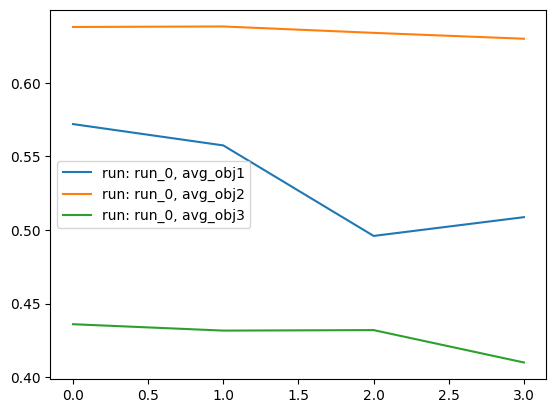

{0: {'min_obj1': 0.53, 'min_obj2': 0.76, 'min_obj3': 0.18, 'avg_obj1': 0.5825, 'avg_obj2': 0.775, 'avg_obj3': 0.2525}, 1: {'min_obj1': 0.5, 'min_obj2': 0.76, 'min_obj3': 0.17, 'avg_obj1': 0.5772727272727273, 'avg_obj2': 0.7827272727272727, 'avg_obj3': 0.25}, 2: {'min_obj1': 0.49, 'min_obj2': 0.76, 'min_obj3': 0.17, 'avg_obj1': 0.5758333333333333, 'avg_obj2': 0.7808333333333334, 'avg_obj3': 0.25}, 3: {'min_obj1': 0.49, 'min_obj2': 0.76, 'min_obj3': 0.15, 'avg_obj1': 0.545, 'avg_obj2': 0.77625, 'avg_obj3': 0.25125}}


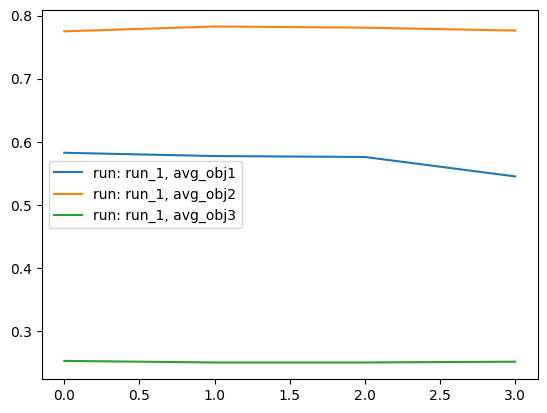

{0: {'min_obj1': 0.53, 'min_obj2': 0.8, 'min_obj3': 0.14, 'avg_obj1': 0.58, 'avg_obj2': 0.8160000000000001, 'avg_obj3': 0.19}, 1: {'min_obj1': 0.52, 'min_obj2': 0.8, 'min_obj3': 0.12, 'avg_obj1': 0.57, 'avg_obj2': 0.8099999999999999, 'avg_obj3': 0.162}, 2: {'min_obj1': 0.51, 'min_obj2': 0.8, 'min_obj3': 0.12, 'avg_obj1': 0.5542857142857143, 'avg_obj2': 0.812857142857143, 'avg_obj3': 0.16142857142857142}, 3: {'min_obj1': 0.47, 'min_obj2': 0.8, 'min_obj3': 0.12, 'avg_obj1': 0.5433333333333333, 'avg_obj2': 0.8122222222222223, 'avg_obj3': 0.17}}


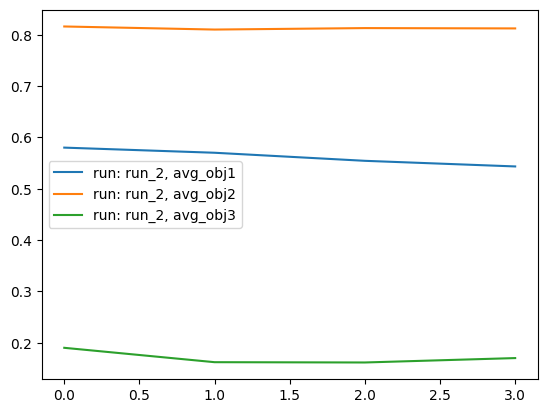

In [12]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        avg_obj1_values = []
        avg_obj2_values = []
        avg_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            avg_obj1 = gen_values["avg_obj1"]
            avg_obj2 = gen_values["avg_obj2"]
            avg_obj3 = gen_values["avg_obj3"]

            avg_obj1_values.append(avg_obj1)
            avg_obj2_values.append(avg_obj2)
            avg_obj3_values.append(avg_obj3)

        plt.plot(gens, avg_obj1_values, label=f"run: {run}, avg_obj1")
        plt.plot(gens, avg_obj2_values, label=f"run: {run}, avg_obj2")
        plt.plot(gens, avg_obj3_values, label=f"run: {run}, avg_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)